### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [3]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [3]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


###### Question 1

**What is the top 50 common start station in Chicago?**

In [4]:
# Count the number of occurrences of starting stations in Chicago
chicago_start_stations = as.data.frame(table(chi$Start.Station))
names(chicago_start_stations) = c("Start.Station", "Frequency")

In [5]:
# Get the 50 most popular starting stations in Chicago
top_50_chicago <- chicago_start_stations[order(-chicago_start_stations$Frequency), ][1:50, ]
print(top_50_chicago)

                          Start.Station Frequency
422             Streeter Dr & Grand Ave       210
246           Lake Shore Dr & Monroe St       140
119        Clinton St & Washington Blvd       120
115             Clinton St & Madison St       102
66                  Canal St & Adams St       101
302               Michigan Ave & Oak St        98
68                Canal St & Madison St        87
121           Columbus Dr & Randolph St        85
247          Lake Shore Dr & North Blvd        85
187             Franklin St & Monroe St        81
237            Kingsbury St & Kinzie St        79
304        Michigan Ave & Washington St        79
293            McClurg Ct & Illinois St        77
424                 Theater on the Lake        77
300              Michigan Ave & Lake St        73
307                     Millennium Park        73
113           Clinton St & Jackson Blvd        65
380                      Shedd Aquarium        63
262           LaSalle St & Jackson Blvd        60


In [8]:
library(ggplot2)

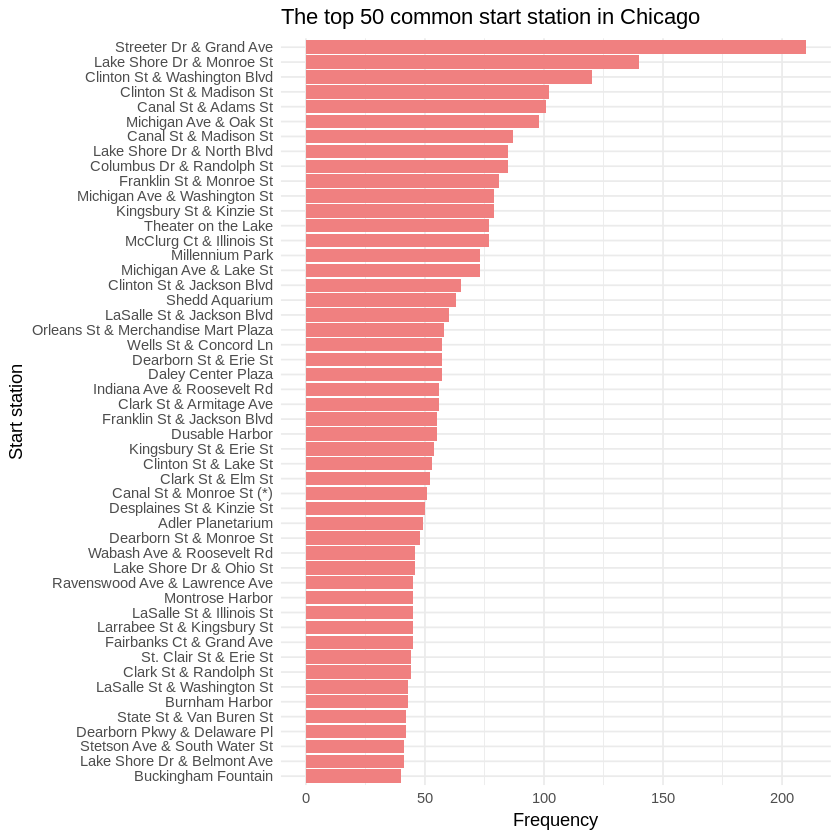

In [19]:
# Draw a bar chart for Chicago's 50 most popular starting stations
ggplot(top_50_chicago, aes(x = reorder(Start.Station, Frequency), y = Frequency)) +
  geom_bar(stat = "identity", fill = "lightcoral") +
  coord_flip() + 
  labs(title = "The top 50 common start station in Chicago",
       x = "Start station", y = "Frequency") +
  theme_minimal()

**Summary**

1. Most Popular Starting Station: The "Streeter Dr & Grand Ave" station has the highest frequency on the list, indicating that it is the most popular starting point for service users in Chicago. This may be due to the station's location near popular attractions, such as tourist or commercial areas.

2. Frequency Distribution: Frequency decreases from the most popular stations to the less popular stations. Stations at the bottom of the list like "Lake Shore Dr & Belmont Ave" and "Buckingham Fountain" have much lower frequencies than the stations at the top

3. High concentration in the city center: Many popular stations such as "Clinton St & Washington Blvd", "Canal St & Adams St", and "Michigan Ave & Oak St" show high demand for service in central areas or near major routes.

4. Special areas: Some stations near famous places such as "Shedd Aquarium", "Adler Planetarium", and "Buckingham Fountain" also have significant frequency, proving that service users tend to use bicycles for sightseeing or entertainment.

5. Diverse distribution: The top 50 list includes stations scattered in many different areas, showing that the service system has covered a wide area, meeting the needs of both local residents and tourists.

Conclusion:
The stations in the city center and near tourist attractions are where the demand for bicycles is highest.
The bicycle station system is used effectively for both daily travel and tourism purposes.


### Question 2

**Compare the number of each type of user in the 3 cities?**

In [10]:
# Calculate the number of users by type for each city
chicago_user_type = as.data.frame(table(chi$User.Type))
names(chicago_user_type) = c("User.Type", "Frequency")
nyc_user_type = as.data.frame(table(ny$User.Type))
names(nyc_user_type) = c("User.Type", "Frequency")
washington_user_type = as.data.frame(table(wash$User.Type))
names(washington_user_type) = c("User.Type", "Frequency")

In [11]:
# Create a column for the city
chicago_user_type$City = "Chicago"
nyc_user_type$City = "New York City"
washington_user_type$City = "Washington, DC"


In [12]:
# Combine all data into a single table
user_type_data = rbind(chicago_user_type, nyc_user_type, washington_user_type)
print(user_type_data)

   User.Type Frequency           City
1                    1        Chicago
2   Customer      1746        Chicago
3 Subscriber      6883        Chicago
4                  119  New York City
5   Customer      5558  New York City
6 Subscriber     49093  New York City
7                    1 Washington, DC
8   Customer     23450 Washington, DC
9 Subscriber     65600 Washington, DC


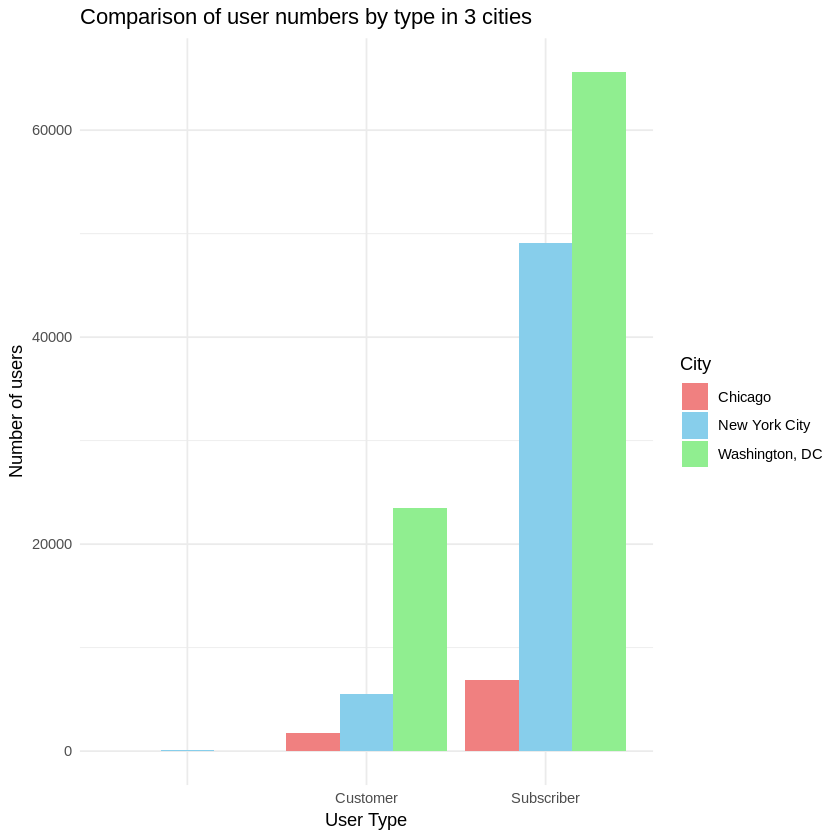

In [13]:
# Graph comparing number of users by type in cities
ggplot(user_type_data, aes(x = User.Type, y = Frequency, fill = City)) +
  geom_bar(stat = "identity", position = "dodge") + 
  labs(title = "Comparison of user numbers by type in 3 cities",
       x = "User Type", y = "Number of users") +
  scale_fill_manual(values = c("Chicago"="lightcoral","New York City" = "skyblue", "Washington, DC" = "lightgreen")) +
  theme_minimal()

**Summary**
1. “Customer” user group: The number of users in this group is relatively small in all three cities. Washington, DC has the largest number of customers, followed by New York City and finally Chicago.

2. “Subscriber” user group: This group accounts for the majority of users in all three cities. Washington, DC has the highest number of subscribers (over 60,000), followed by New York City and Chicago.

3. Overall comparison: Washington, DC leads in total users, especially in the “Subscriber” group. Chicago has the lowest total users in both groups. New York City is in the middle of both groups.

Conclusion: Overall, the “Subscriber” group is the dominant user group, accounting for the majority in all three cities, while the “Customer” group accounts for only a small portion. Washington, DC has an overwhelming number of users compared to the other two cities.

### Question 3

**Which year of birth has the highest frequency of users in both cities (since 1970)?**

In [14]:
# Filter data to only get people born in 1970 or later
new_york_city_filtered <- ny[ny$Birth.Year >= 1970, ]
chicago_filtered <- chi[chi$Birth.Year >= 1970, ]

In [15]:
# Create a birth year frequency table for New York City (since 1970)
birth_year_nyc <- table(new_york_city_filtered$Birth.Year)

# Create a birth year frequency table for Chicago (since 1970)
birth_year_chicago <- table(chicago_filtered$Birth.Year)

In [16]:
# Convert frequency tables to dataframe
birth_year_nyc_df <- as.data.frame(birth_year_nyc)
birth_year_chicago_df <- as.data.frame(birth_year_chicago)

# Rename columns for ease of understanding
colnames(birth_year_nyc_df) <- c("Birth.Year", "Frequency")
colnames(birth_year_chicago_df) <- c("Birth.Year", "Frequency")

# Add a "City" column to differentiate between two cities
birth_year_nyc_df$City <- "New York City"
birth_year_chicago_df$City <- "Chicago"

# Combine data from both cities into one dataframe
combined_data <- rbind(birth_year_nyc_df, birth_year_chicago_df)

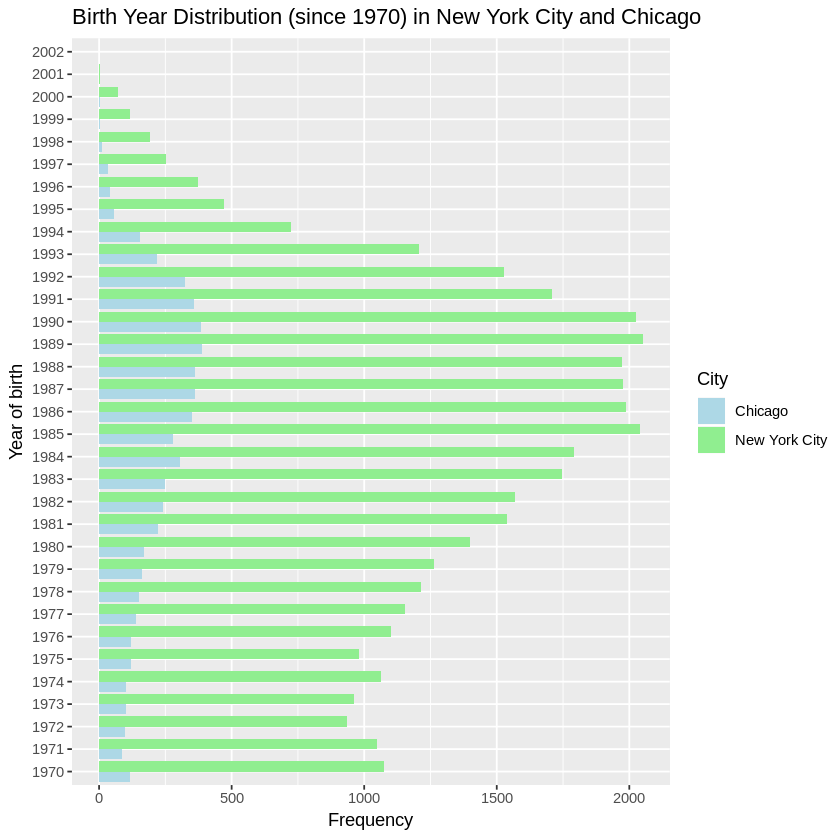

In [17]:
# Draw a horizontal bar chart of the year of birth distribution since 1970
ggplot(combined_data, aes(x = as.factor(Birth.Year), y =Frequency , fill = City)) +
  geom_bar(stat = "identity", position = "dodge") +  # position = "dodge" so that the columns of the two cities do not overlap
  labs(title = "Birth Year Distribution (since 1970) in New York City and Chicago",
       x = "Year of birth",
       y = "Frequency") +
  scale_fill_manual(values = c("lightblue", "lightgreen")) +  # Customize colors for each city
  coord_flip()

**Summary**
1. General Trends:
The chart shows the distribution of birth years of users since 1970 in New York City and Chicago.
The highest frequency is concentrated in the birth years from 1980 to 1995, especially in the 1985-1992 range.

2. Popular Age Groups:
New York City has a higher frequency than Chicago in most birth years.

The most common birth years are 1989 and 1990, with both cities having a dominant presence.

3. Differences between New York City and Chicago:
Chicago's frequency is significantly lower than New York City's in the years before 1985 and after 1995.
The difference is more pronounced in the 1995-2000 birth cohort, where New York City maintains a high frequency while Chicago has a sharp decline.

4. Other observations:
People born between 1970 and 1980 have a significantly lower frequency, suggesting that this is not the age group that primarily uses the service.
The frequency has decreased significantly after 1998, possibly because this age group is young, uses the service less, or has not yet reached the age of use.

Conclusion:
Users in both cities are predominantly born between 1980-1995, with New York City having a larger population than Chicago. This may reflect the working age group (25-45 years old) that is the main target audience for this service.


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [18]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')